In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("E:\\ML\\Advertising.csv")


In [3]:
data.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
13,14,97.5,7.6,7.2,9.7
187,188,191.1,28.7,18.2,17.3
137,138,273.7,28.9,59.7,20.8
165,166,234.5,3.4,84.8,11.9
62,63,239.3,15.5,27.3,15.7


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

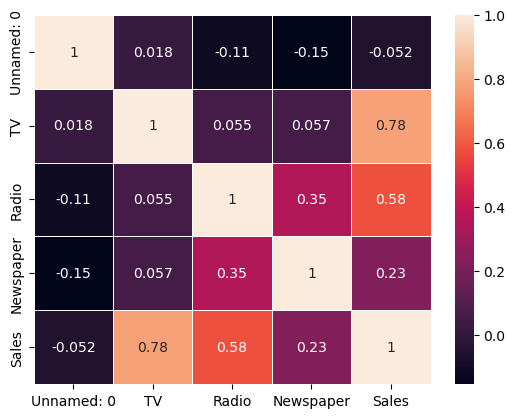

In [10]:
sns.heatmap(data.corr(),cbar=True,linewidths=0.5,annot=True)

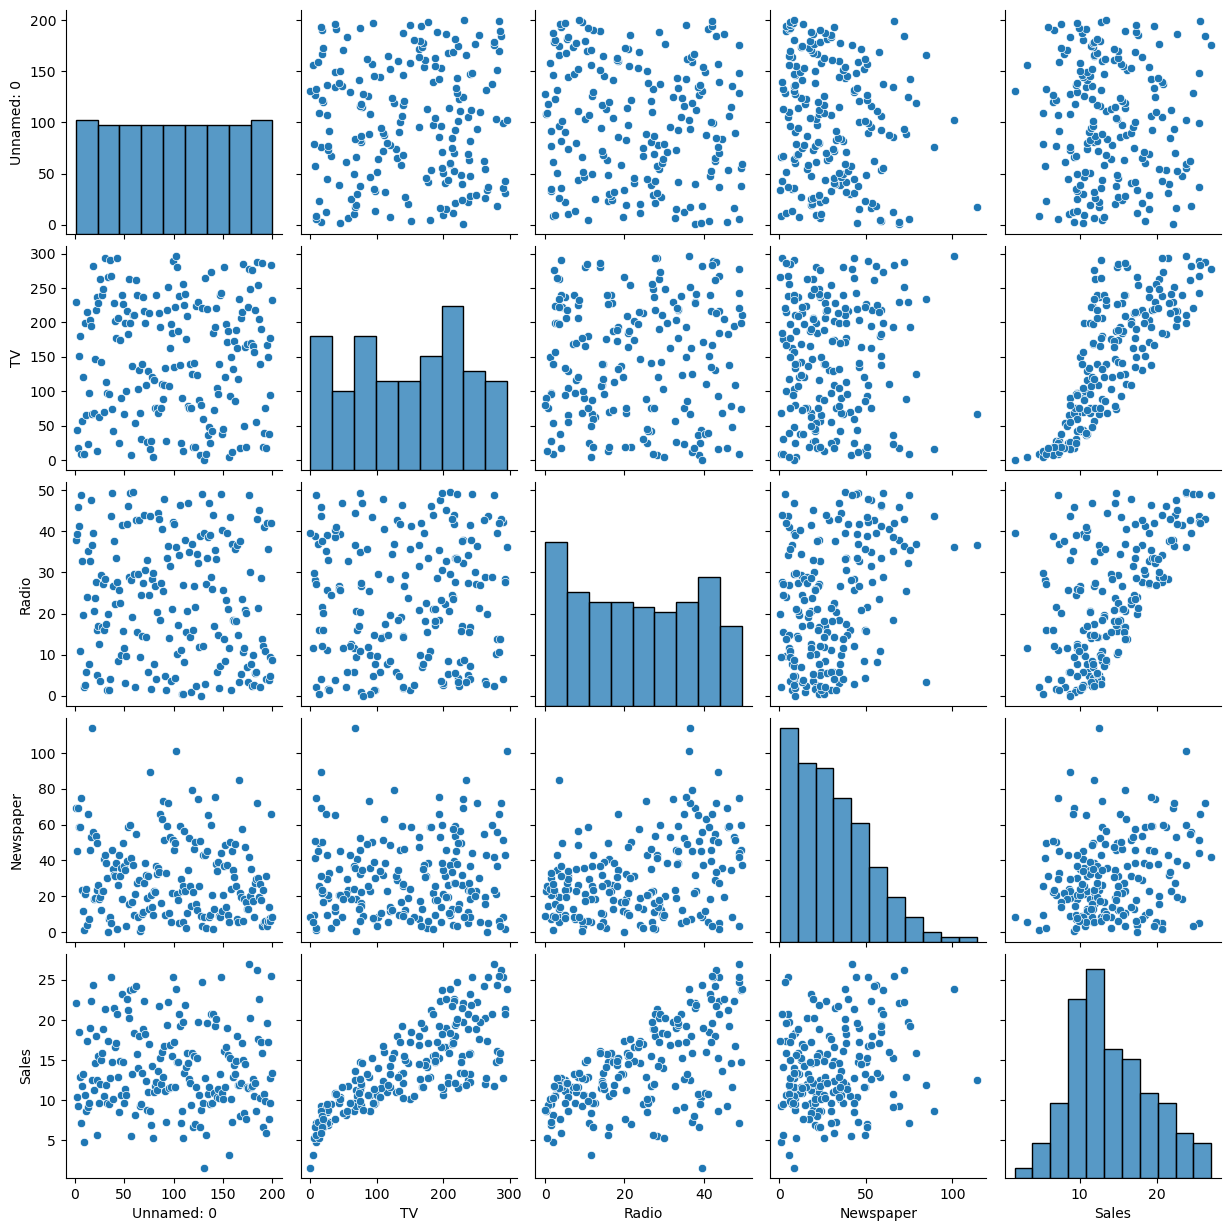

In [11]:
sns.pairplot(data)

<Axes: xlabel='Newspaper', ylabel='Density'>

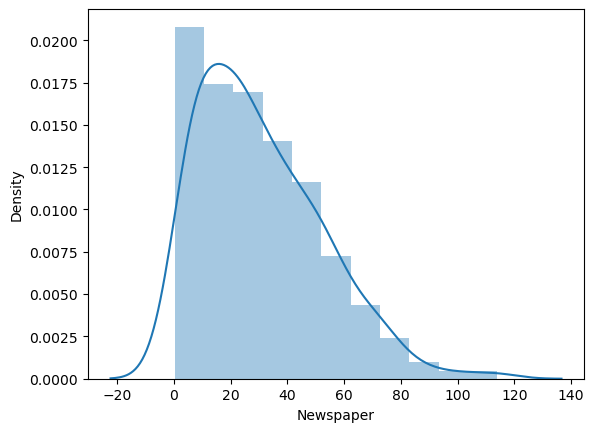

In [12]:
sns.distplot(data['Newspaper'])

<Axes: xlabel='Radio', ylabel='Density'>

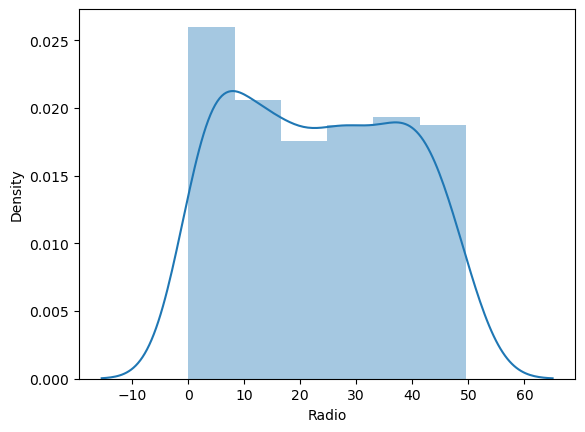

In [13]:
sns.distplot(data['Radio'])

<Axes: xlabel='Sales', ylabel='Density'>

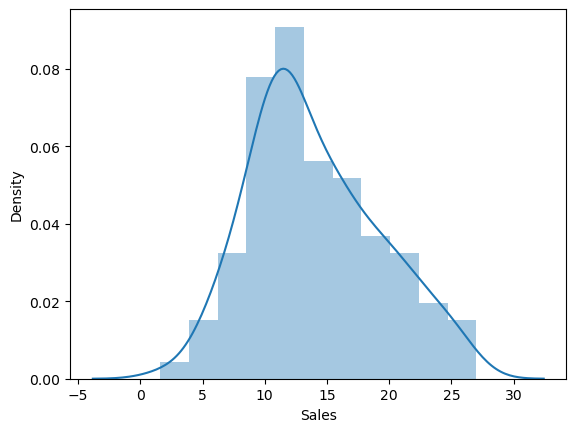

In [14]:
sns.distplot(data['Sales'])

<Axes: xlabel='TV', ylabel='Density'>

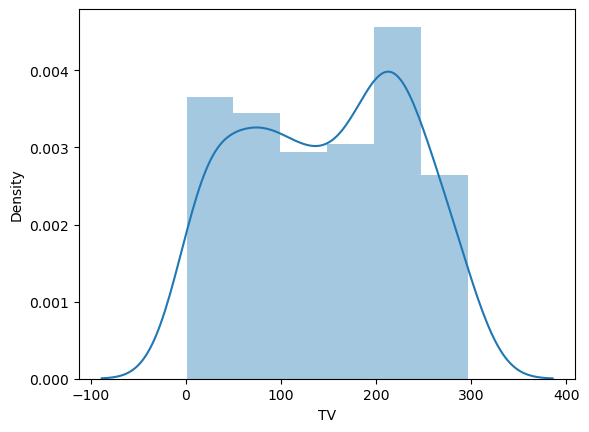

In [15]:
sns.distplot(data['TV'])

In [16]:
data=data.drop(columns=['Unnamed: 0'])

In [17]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
x=data.drop(['Sales'],1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y=data['Sales']

In [20]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(200, 3) (140, 3) (60, 3)


In [23]:
print(y.shape,y_train.shape,y_test.shape)

(200,) (140,) (60,)


In [24]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)


In [25]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)


In [26]:
from sklearn.linear_model import LinearRegression
accuracies={}
lr=LinearRegression()
lr.fit(x_train,y_train)
acc=lr.score(x_test,y_test)*100
accuracies['Linear Regression']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.47%


In [27]:
y_pred=lr.predict(x_test_scaled)

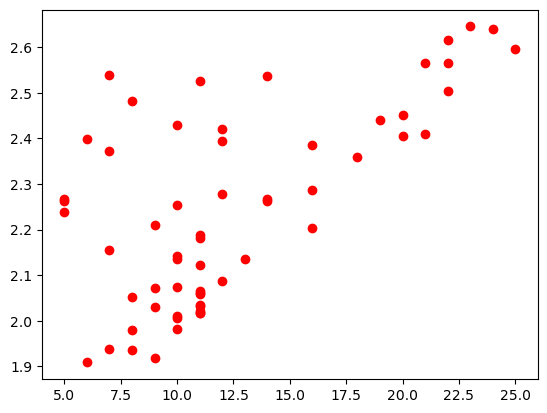

In [28]:
plt.scatter(y_test,y_pred,c='r')